# Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models

# Decision Tree Regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

# Import Libraries

In [1]:
# yahoo_finance is used to fetch data
!pip install yfinance

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset into the Data Frame

In [3]:
# input
symbol = 'AAPL'
start = '2003-01-01'
end = '2023-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,0.256429,0.266429,0.256250,0.264286,0.224939,181428800
2003-01-03,0.264286,0.266607,0.260536,0.266071,0.226458,147453600
2003-01-06,0.268393,0.274643,0.265714,0.266071,0.226458,390532800
2003-01-07,0.264107,0.267857,0.258393,0.265179,0.225699,342344800
2003-01-08,0.260357,0.262679,0.257857,0.259821,0.221138,229644800


# Data Preprocessing

In [4]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2003-01-03,0.264286,0.266607,0.260536,0.266071,0.226458,147453600,1,1,-1,0.006754
2003-01-06,0.268393,0.274643,0.265714,0.266071,0.226458,390532800,0,-1,-1,0.000000
2003-01-07,0.264107,0.267857,0.258393,0.265179,0.225699,342344800,0,-1,-1,-0.003353
2003-01-08,0.260357,0.262679,0.257857,0.259821,0.221138,229644800,0,1,1,-0.020205
2003-01-09,0.261071,0.266429,0.258929,0.262143,0.223115,215252800,0,-1,1,0.008937


# View Dataset

In [5]:
#View Dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2003-01-03,0.264286,0.266607,0.260536,0.266071,0.226458,147453600,1,1,-1,0.006754
2003-01-06,0.268393,0.274643,0.265714,0.266071,0.226458,390532800,0,-1,-1,0.000000
2003-01-07,0.264107,0.267857,0.258393,0.265179,0.225699,342344800,0,-1,-1,-0.003353
2003-01-08,0.260357,0.262679,0.257857,0.259821,0.221138,229644800,0,1,1,-0.020205
2003-01-09,0.261071,0.266429,0.258929,0.262143,0.223115,215252800,0,-1,1,0.008937
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900,1,1,-1,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800,1,-1,-1,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,0,-1,1,-0.030685


# Null value testing and data clearance

In [6]:
# See how many null values in each column
dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Return               0
dtype: int64

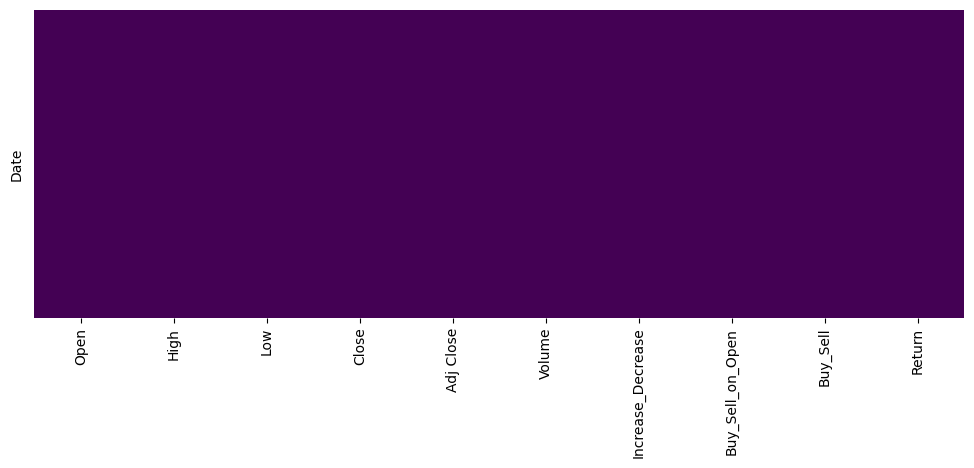

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# Analyze the Data

In [8]:
# see number of rows, number of columns
dataset.shape

(5034, 10)

In [9]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  50340


In [10]:
# view columns names
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Return'],
      dtype='object')

In [11]:
# view data types of the Columns
dataset.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Return               float64
dtype: object

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Return'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

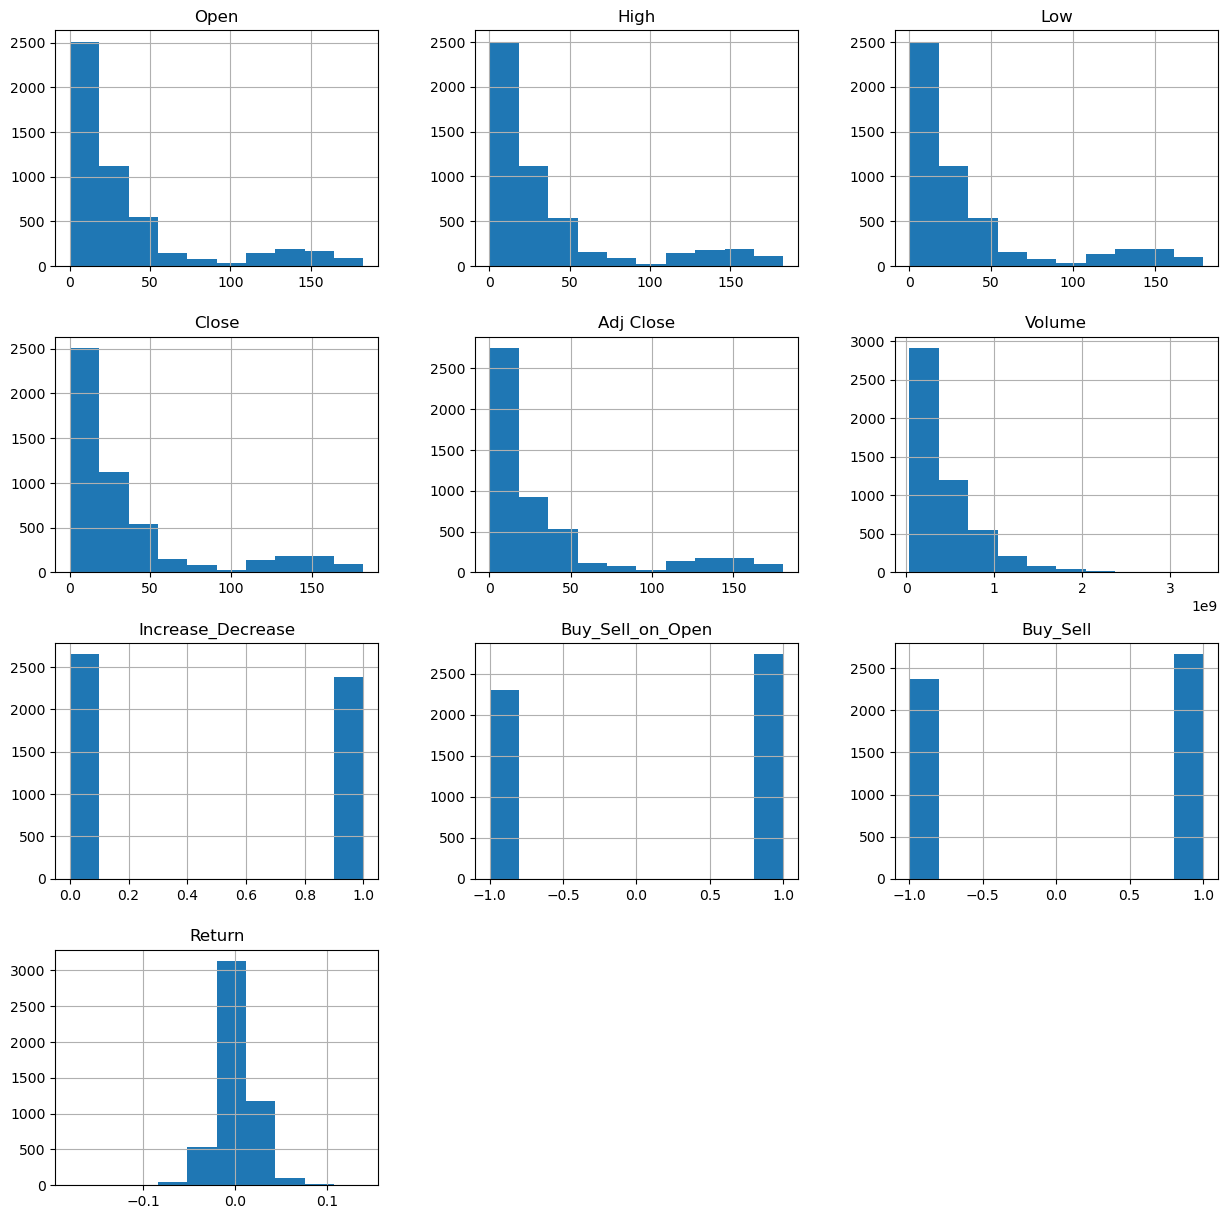

In [12]:
# Histogram per each numerical column
dataset.hist(figsize=(15, 15))

In [13]:
# The statistics per each column
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000,5034.000000,5034.000000,5034.000000
mean,34.346669,34.733552,33.961841,34.361327,32.959478,4.182954e+08,0.473778,0.087406,0.057608,0.001489
std,44.621456,45.173300,44.082192,44.647301,44.550332,3.922911e+08,0.499362,0.996272,0.998438,0.021248
min,0.231964,0.235536,0.227143,0.234286,0.199405,3.519590e+07,0.000000,-1.000000,-1.000000,-0.179195
25%,4.307589,4.374821,4.244375,4.303571,3.662850,1.298692e+08,0.000000,-1.000000,-1.000000,-0.008825
50%,18.512678,18.650179,18.326072,18.536786,16.110529,2.885910e+08,0.000000,1.000000,1.000000,0.001109
75%,41.358125,41.877500,40.898126,41.314374,39.461482,5.838686e+08,1.000000,1.000000,1.000000,0.012228
max,182.630005,182.940002,179.119995,182.009995,180.683884,3.372970e+09,1.000000,1.000000,1.000000,0.139050


# Define X and Y

In [14]:
X = dataset.drop(['Adj Close', 'Close'], axis=1)  
y = dataset['Adj Close'] 

# Split Train data and Test data

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Dataset Traning and Model Traning

In [16]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# Comparison of Actual Values and Predictions Values

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df.head())
print(df.tail())

                Actual   Predicted
Date                              
2018-12-03   44.527958   44.337353
2021-05-06  128.196869  126.979500
2004-07-12    0.442885    0.452613
2004-03-17    0.398050    0.396226
2019-09-18   54.314449   53.345230
               Actual  Predicted
Date                            
2014-05-13  18.882904  18.886398
2003-08-25   0.317042   0.321449
2014-10-03  22.287285  23.083677
2007-04-27   3.037276   3.041532
2005-03-04   1.301300   1.284277


In [19]:
print(y_test.shape)
print(y_pred.shape)

(1007,)
(1007,)


# Accuracy and Loss Function Values of the Model

In [20]:
from sklearn import metrics  
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.3362094882021121
Mean_Squared_Error(MSE): 0.4936029125826738
Root_Mean_Squared_Error(RMSE): 0.7025687956226592


In [21]:
from sklearn.model_selection import cross_val_score

dt_fit = regressor.fit(X_train, y_train)
dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)

In [22]:
print("Accuracy score: {:.7f}".format(regressor.score(X_test, y_test)))

Accuracy score: 0.9997595
